In [1]:
import torch
import torchvision
from torchvision import transforms
from torchvision.datasets import ImageFolder

Training Set Size: 60000
Testing Set Size: 10000


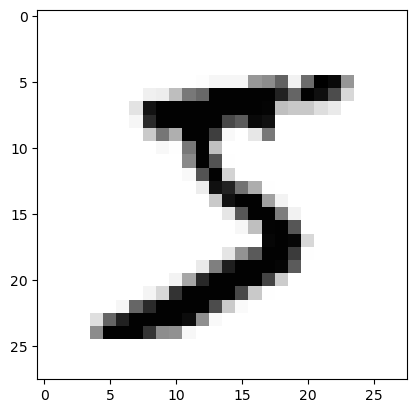

5


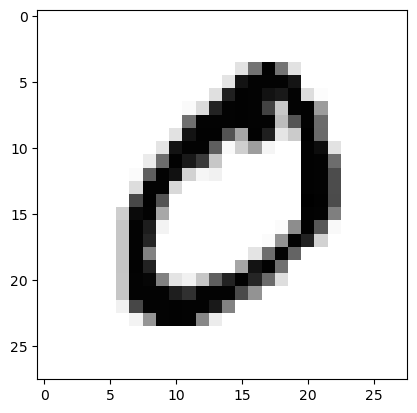

0


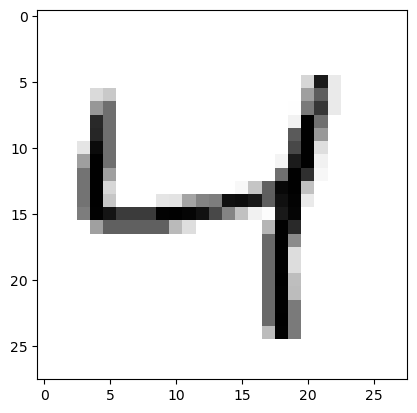

4


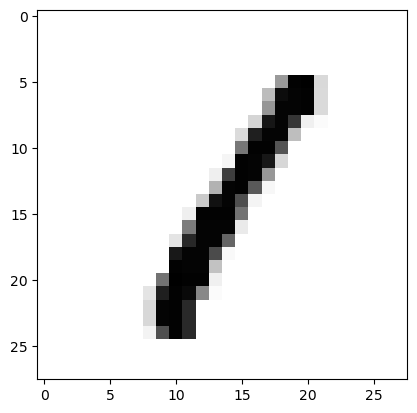

1


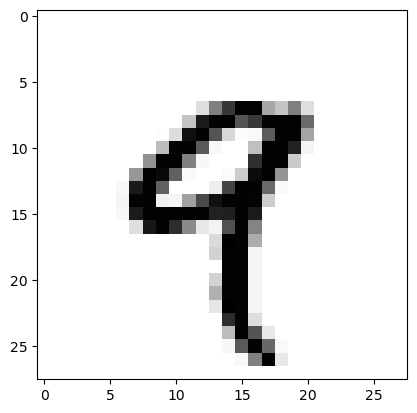

9


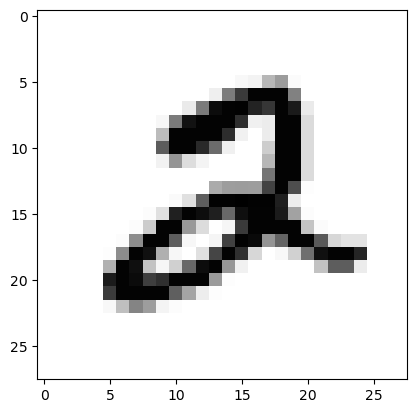

2


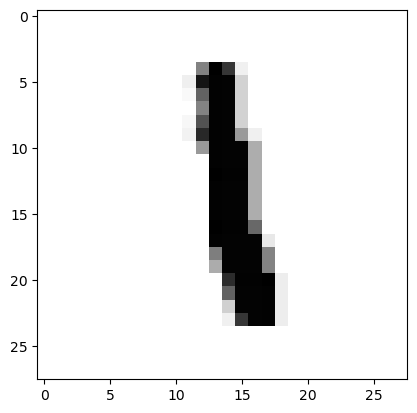

1


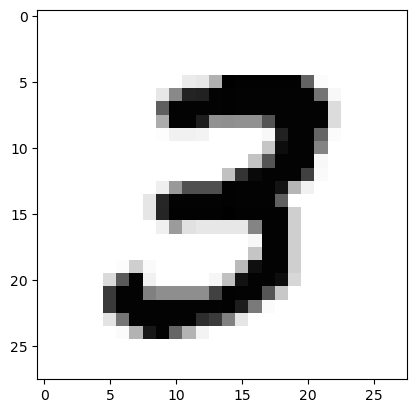

3


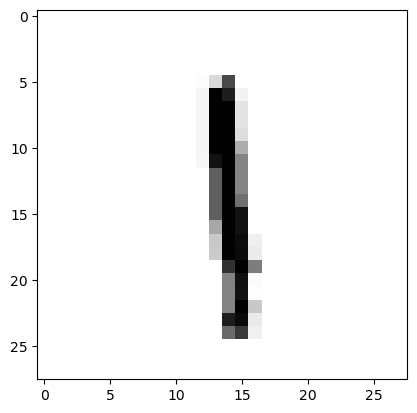

1


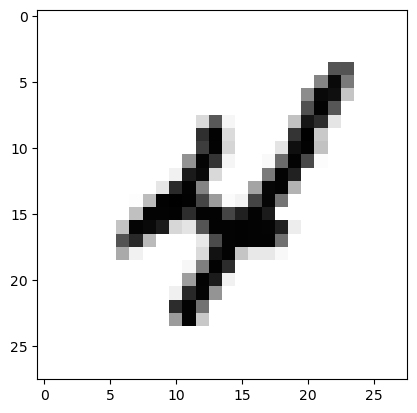

4


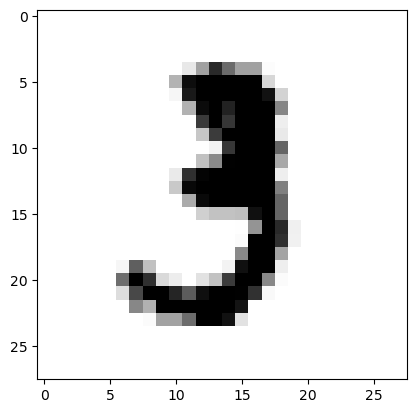

3


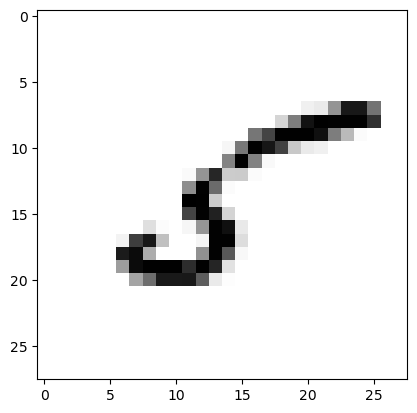

5


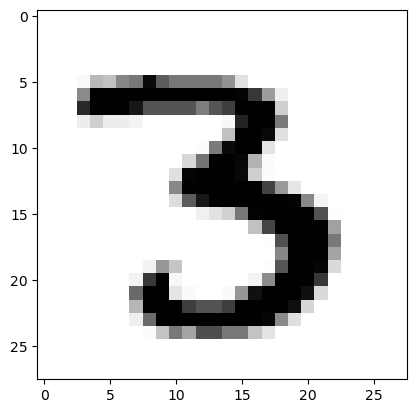

3


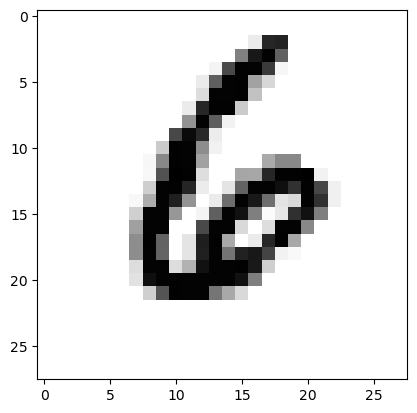

6


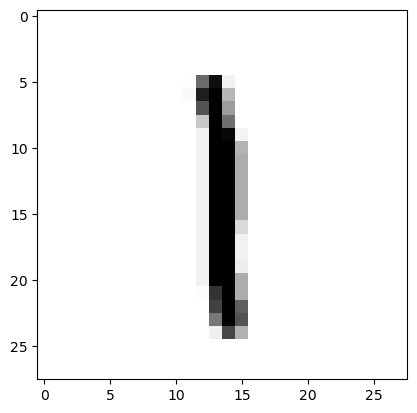

1


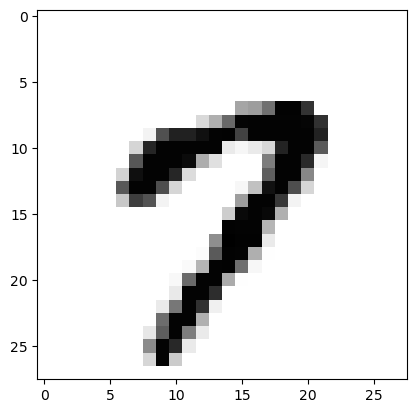

7


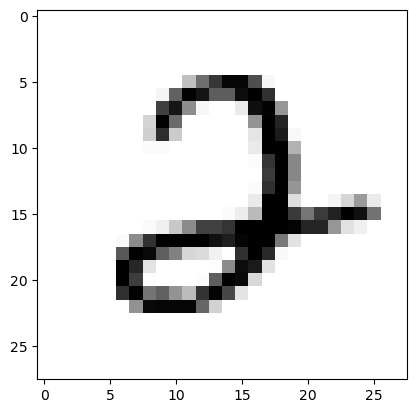

2


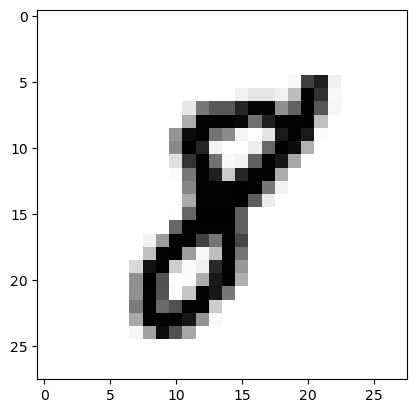

8


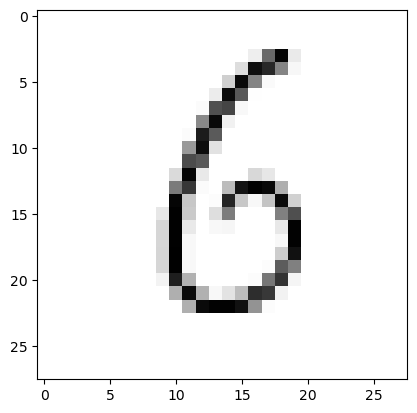

6


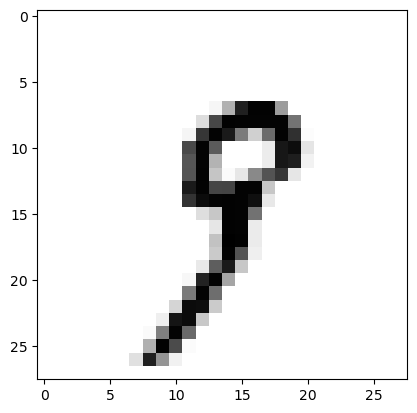

9


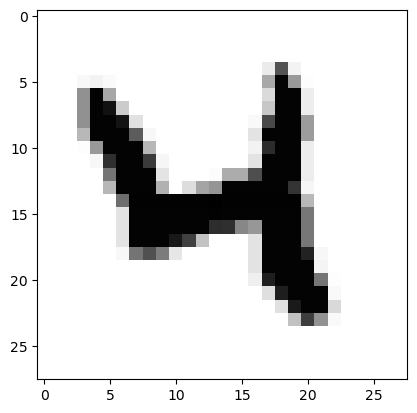

4


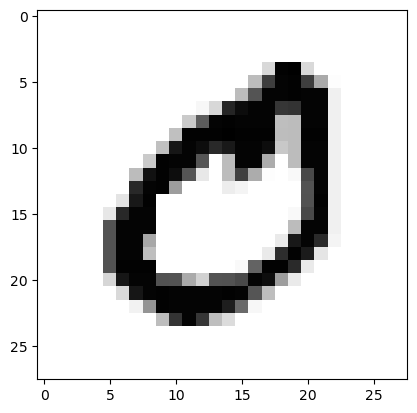

0


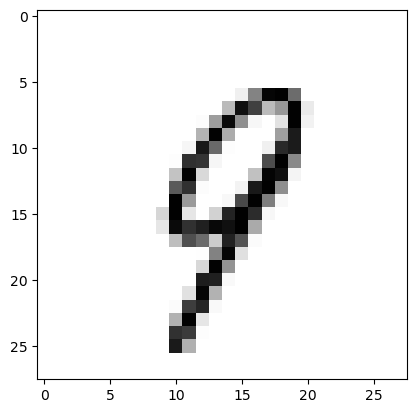

9


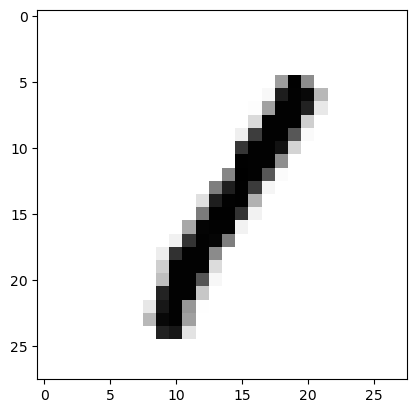

1


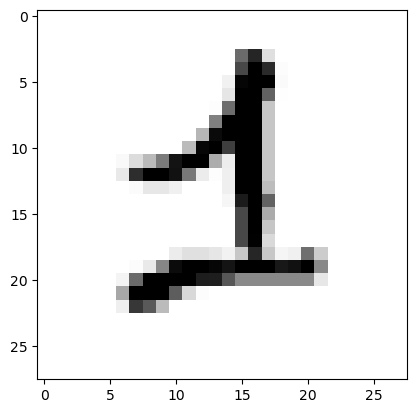

1


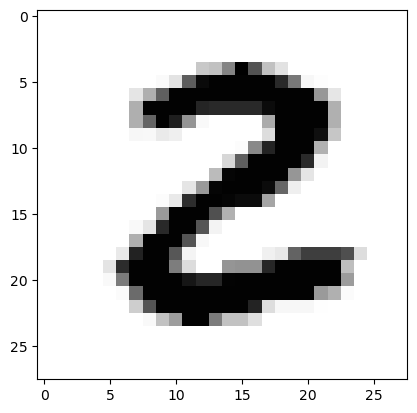

2


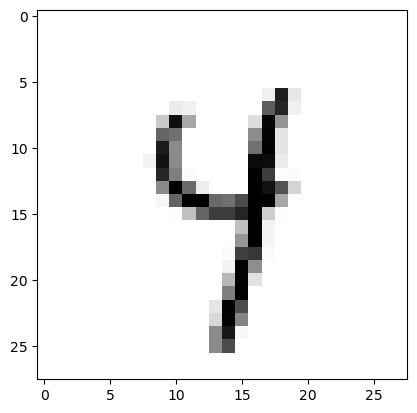

4


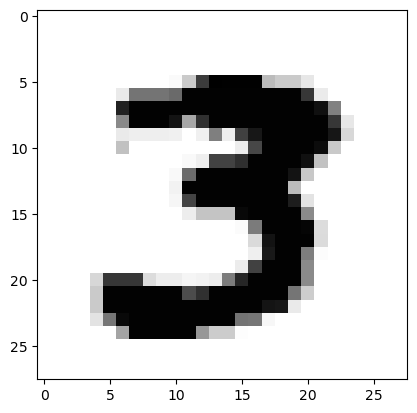

3


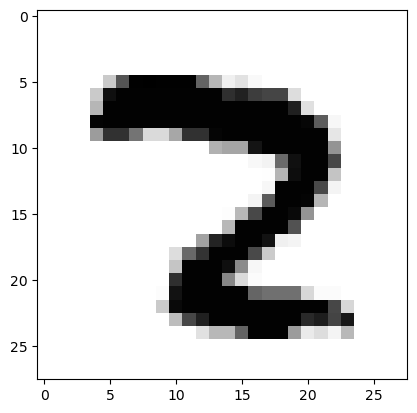

2


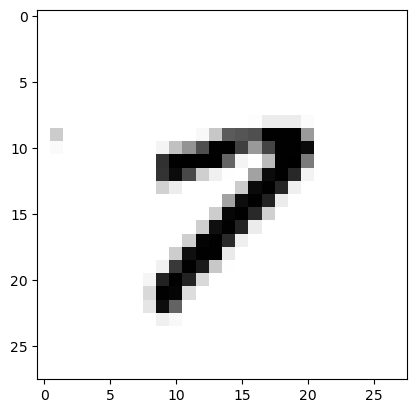

7


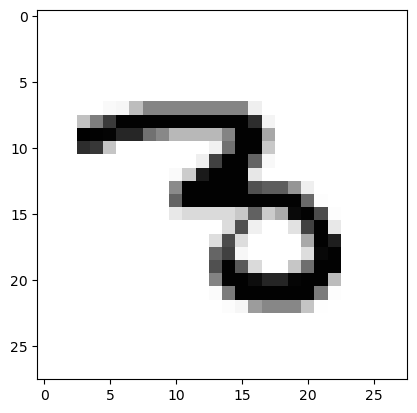

3


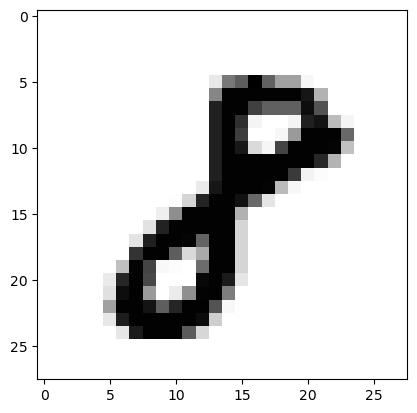

8


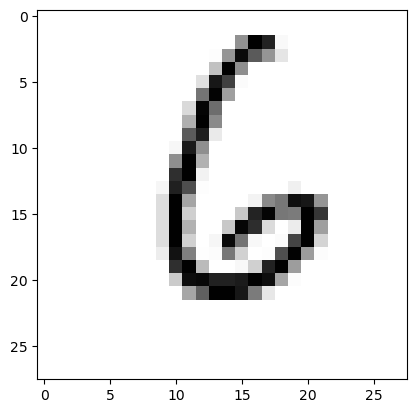

6


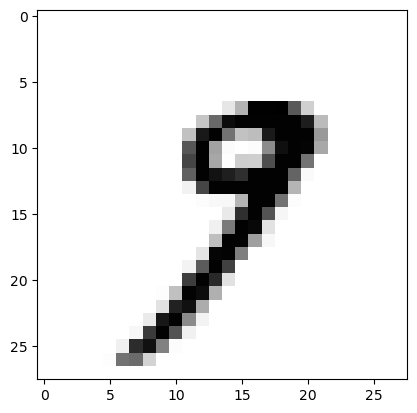

9


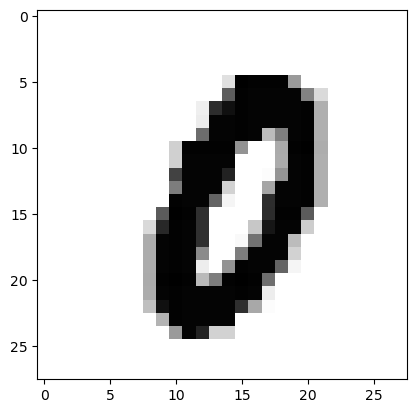

0


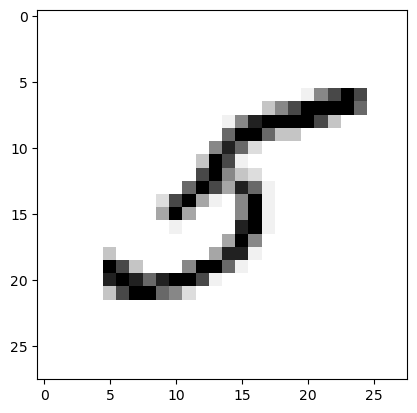

5


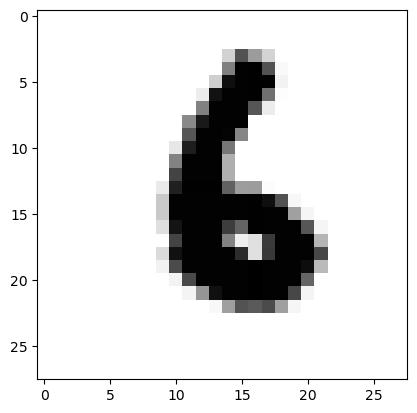

6


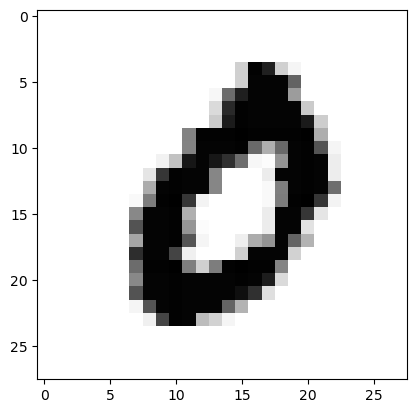

0


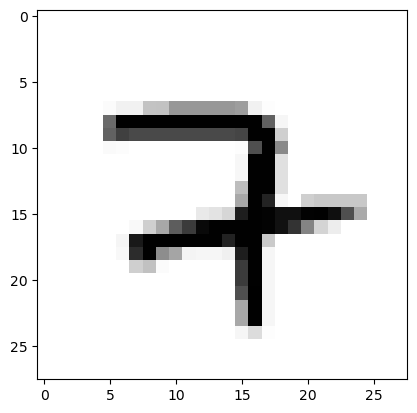

7


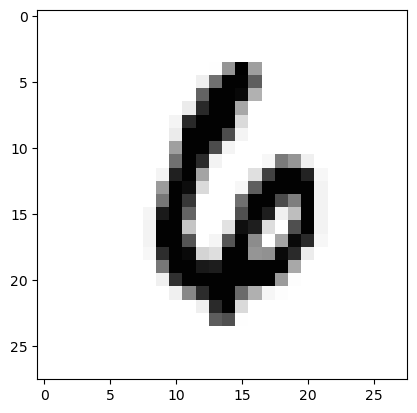

6


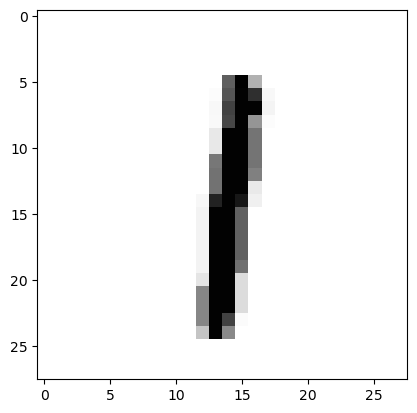

1


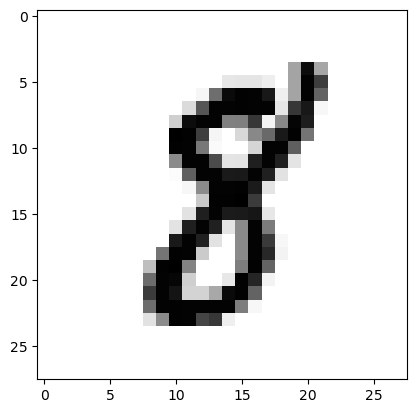

8


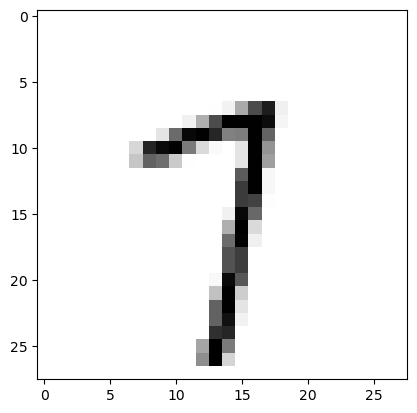

7


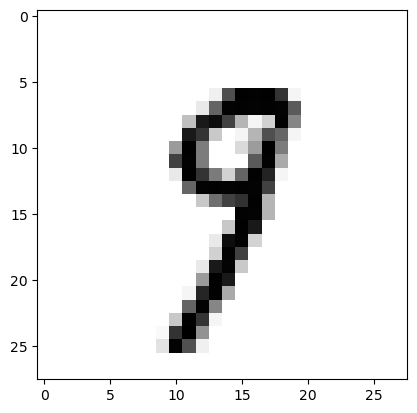

9


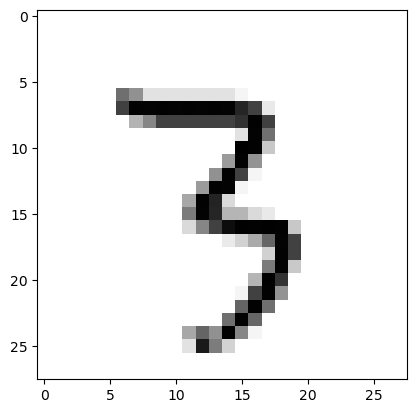

3


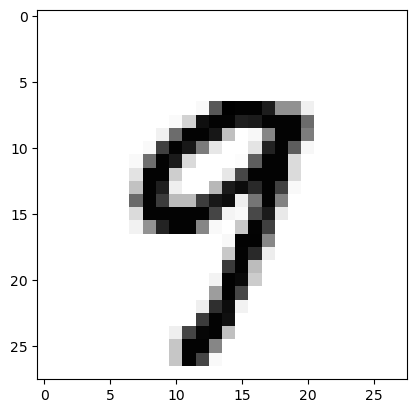

9


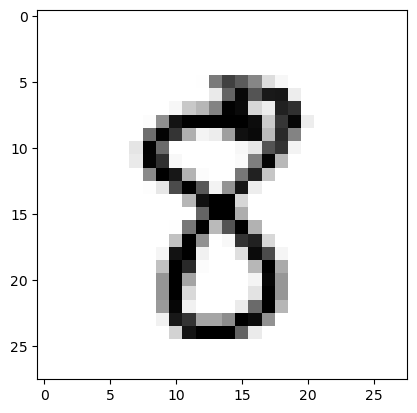

8


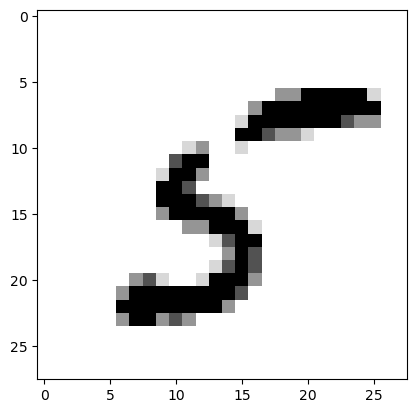

5


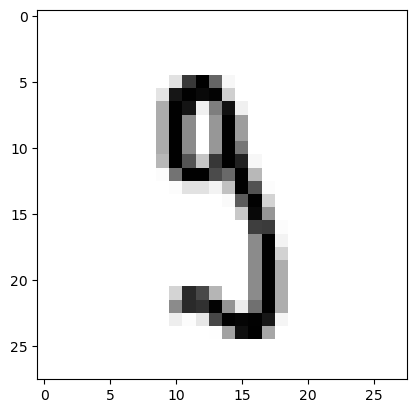

9


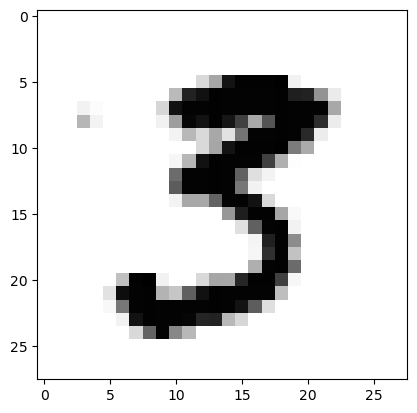

3


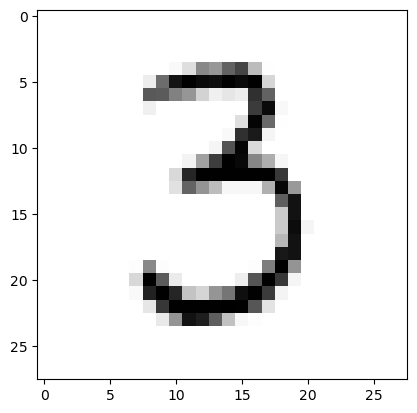

3


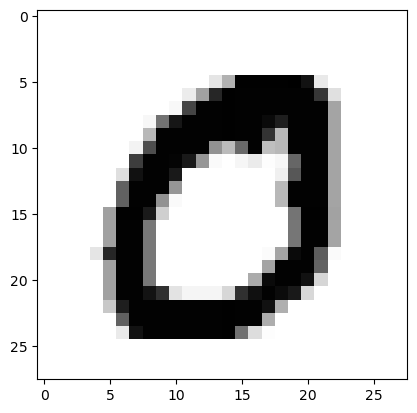

0


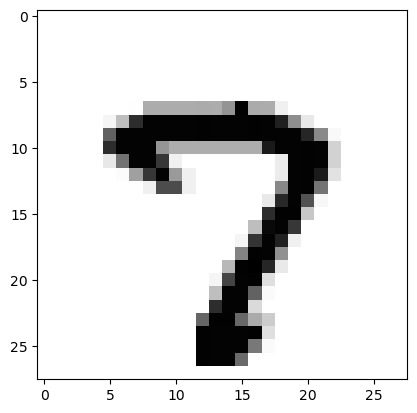

7


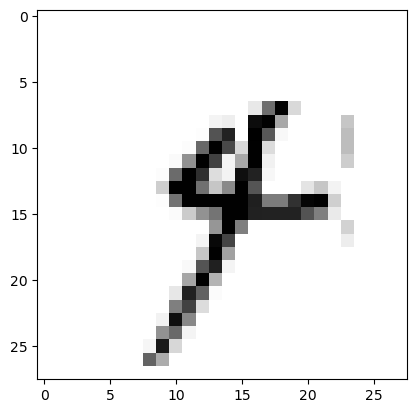

4


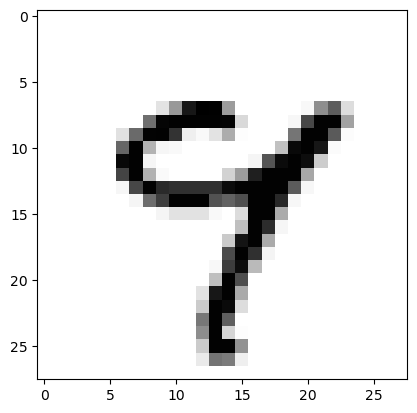

9


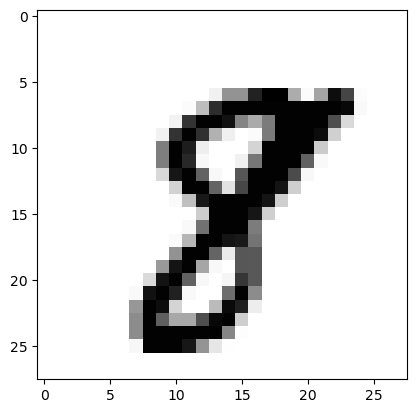

8


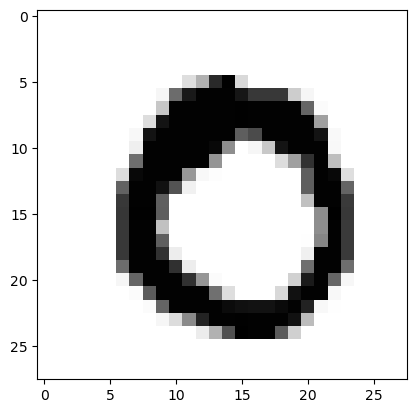

0


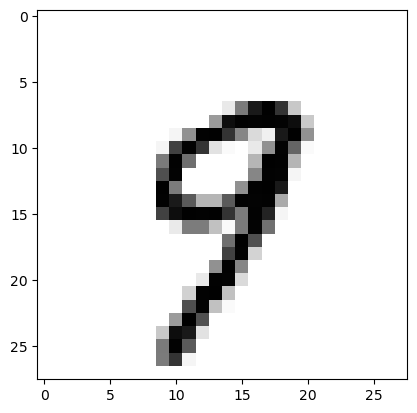

9


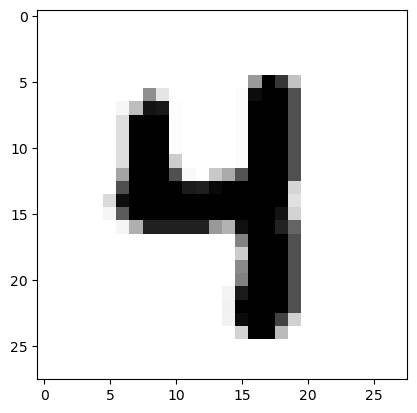

4


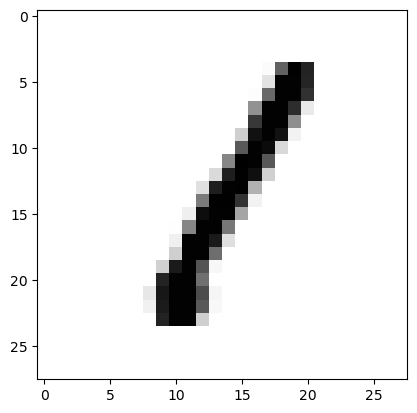

1


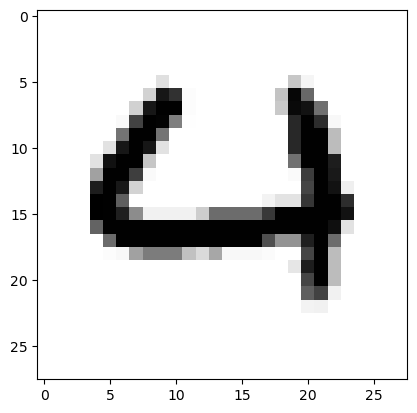

4


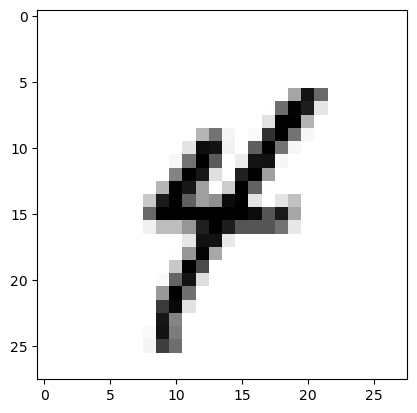

4


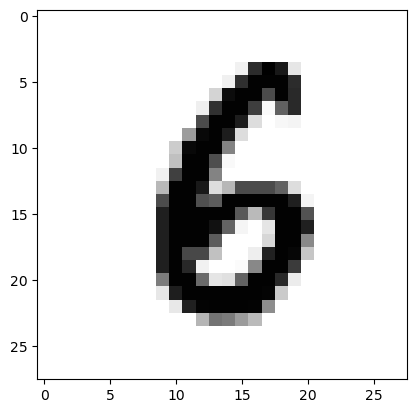

6


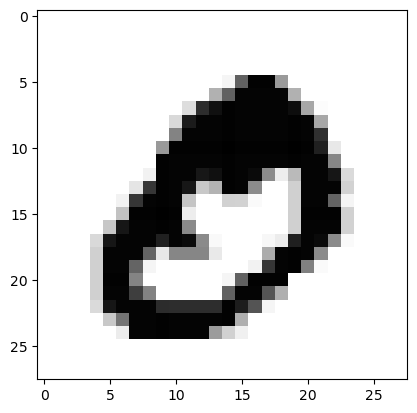

0


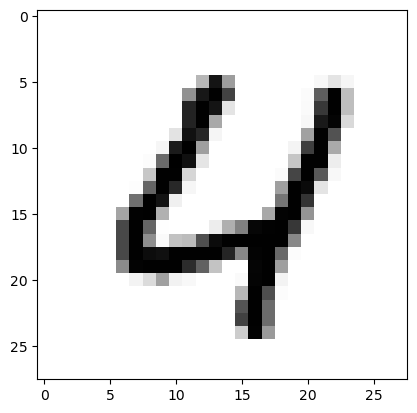

4


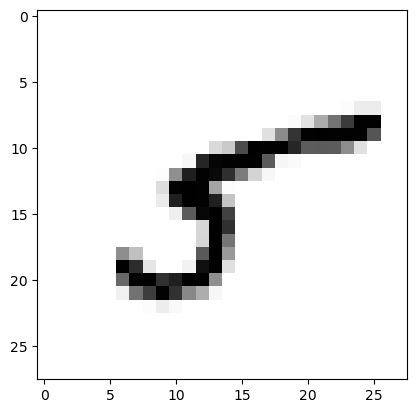

5


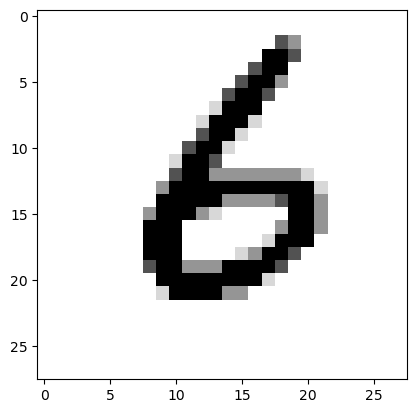

6


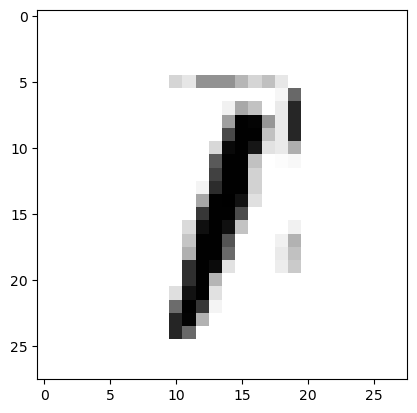

1


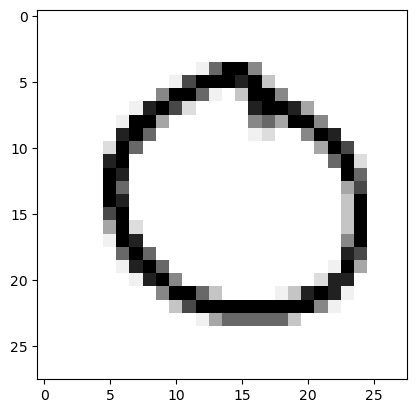

0


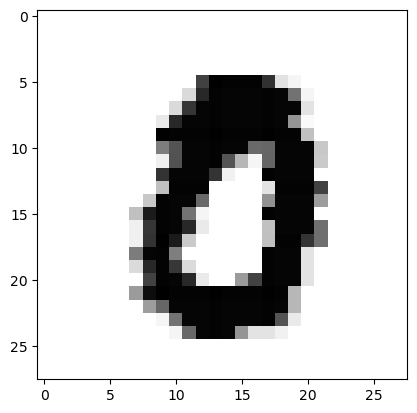

0


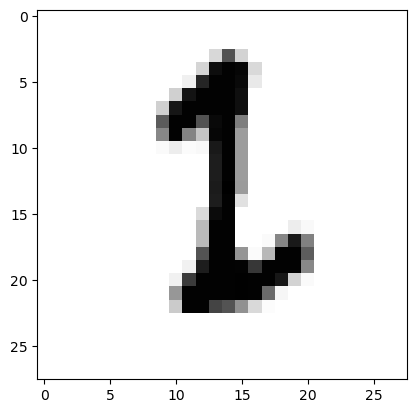

1


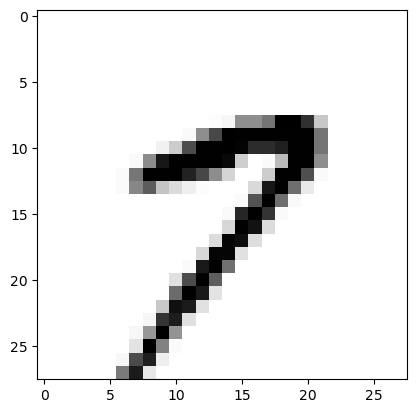

7


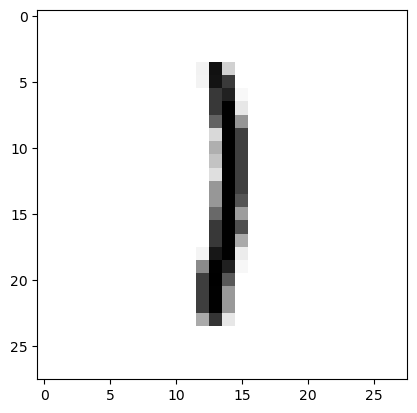

1


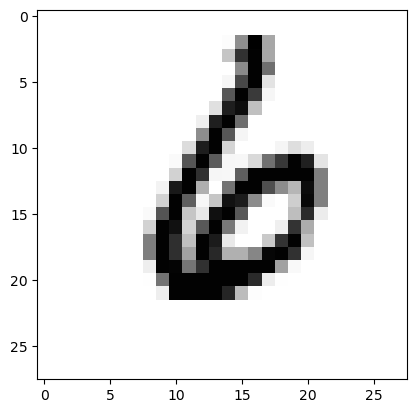

6


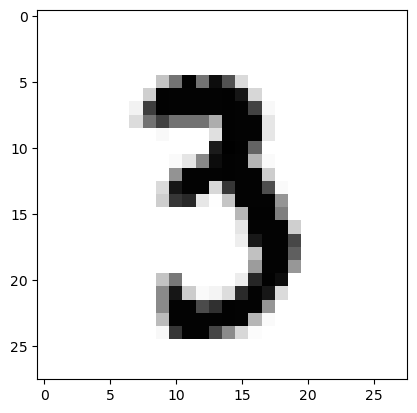

3


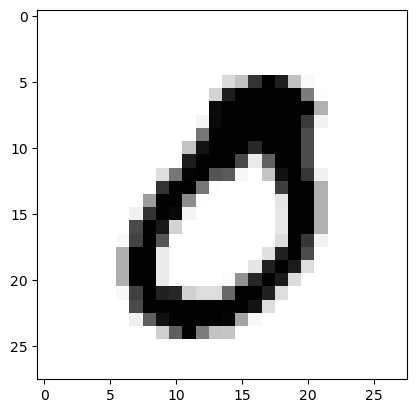

0


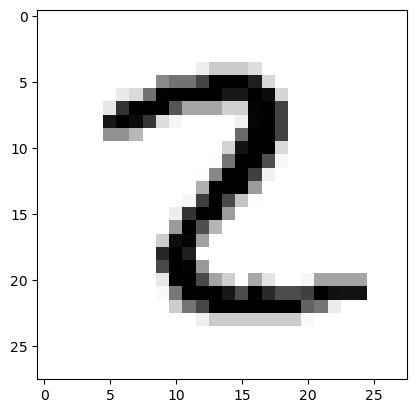

2


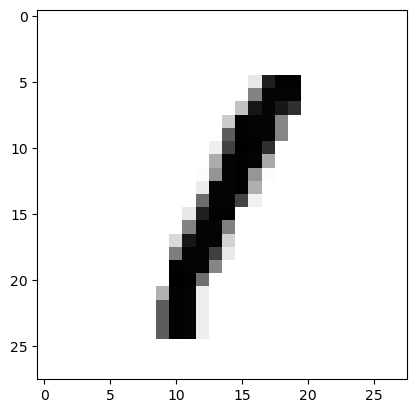

1


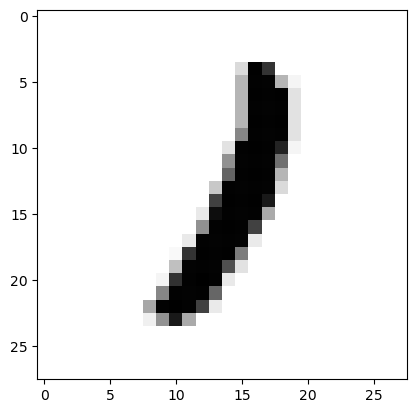

1


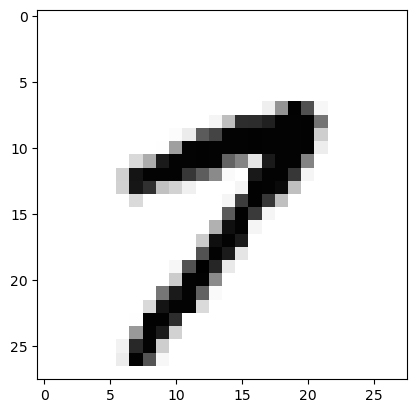

7


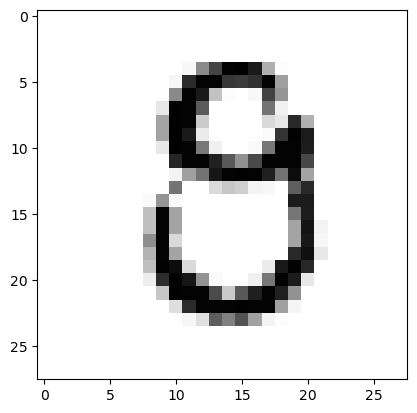

9


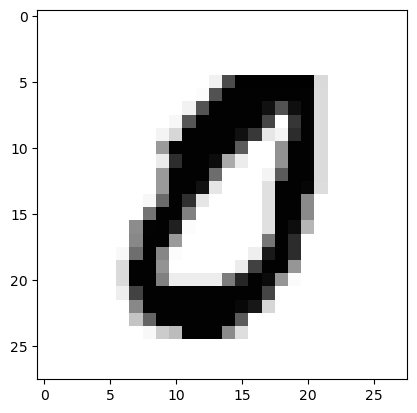

0


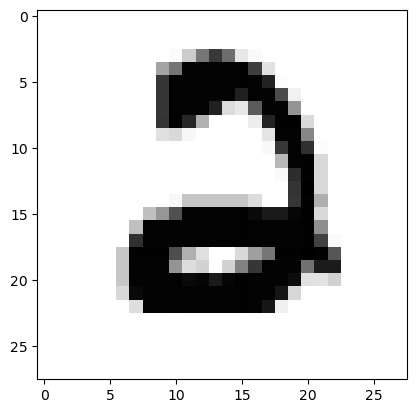

2


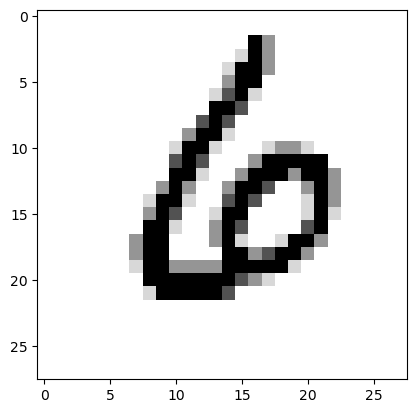

6


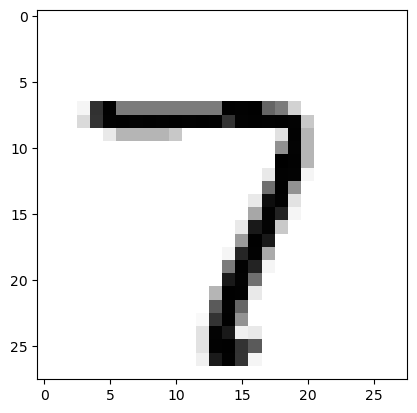

7


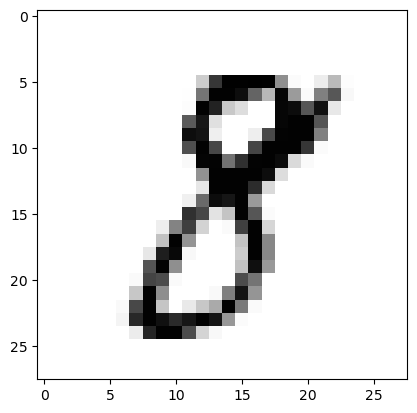

8


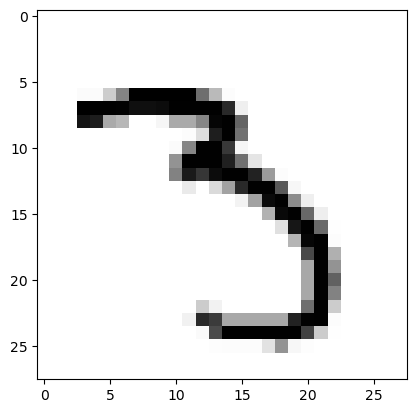

3


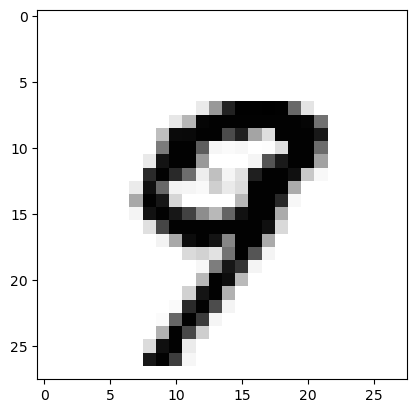

9


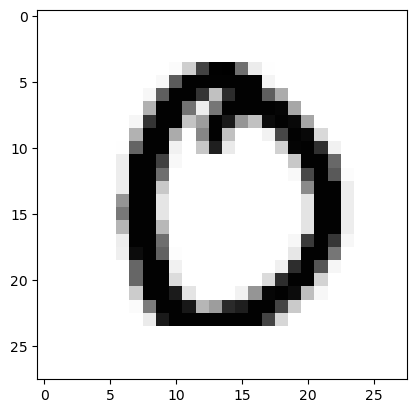

0


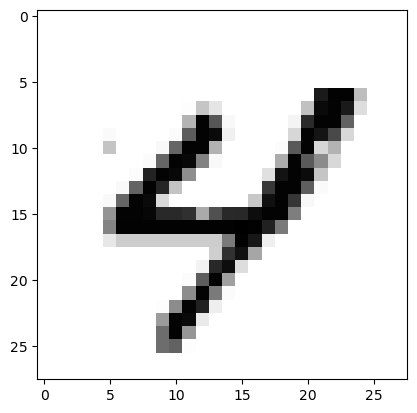

4


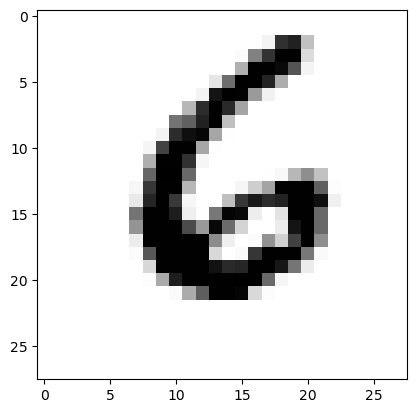

6


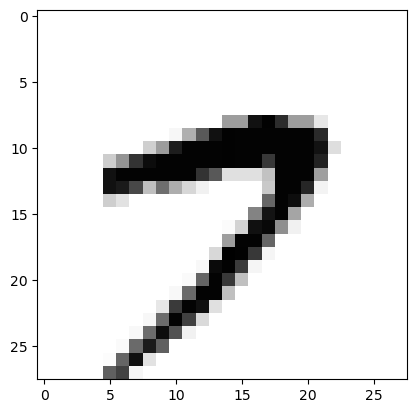

7


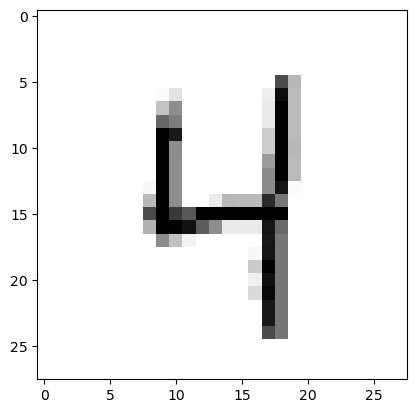

4


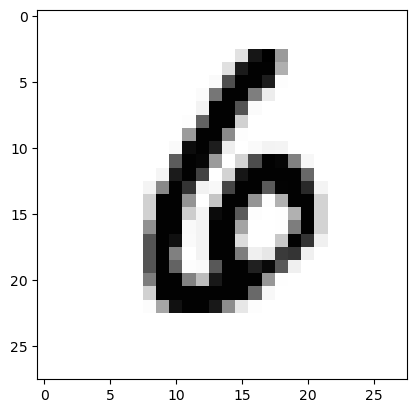

6


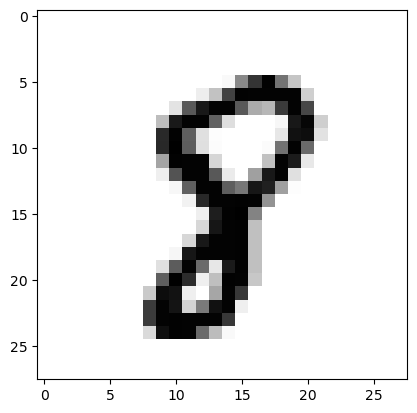

8


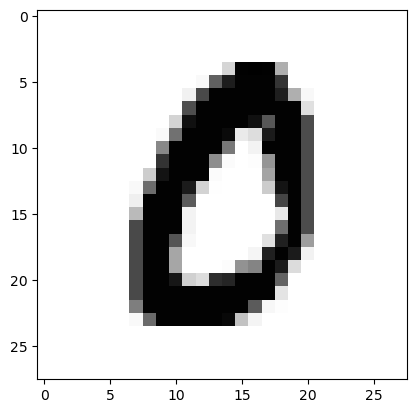

0


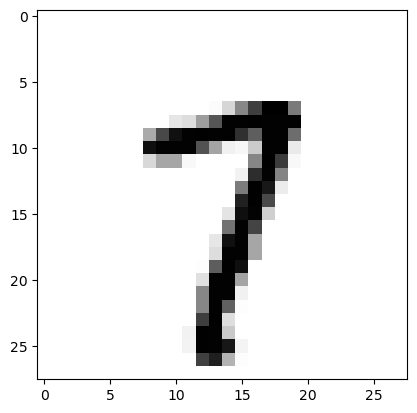

7


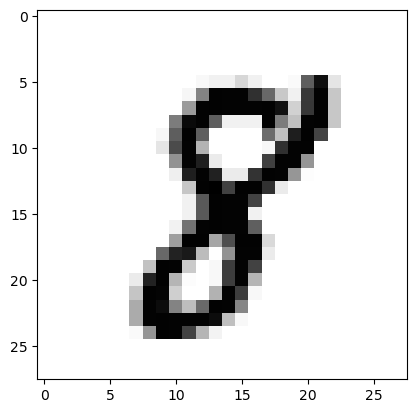

8


KeyboardInterrupt: 

In [36]:
import pickle
import matplotlib.pyplot as plt

f = open("MNIST", "rb")
data = pickle.load(f)
f.close()
print("Training Set Size:", len(data["train"]))
print("Testing Set Size:", len(data["test"]))
'''
print(type(data["train"][0]["image"]))
print(data["train"][0]["image"].dtype)
print(type(data["train"]))
'''
for pair in data["train"]:
    plt.imshow(pair["image"], cmap="Greys")
    plt.show()
    print(pair["label"])


In [69]:
data["train"][0]["image"]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [77]:
from torch.utils.data import Dataset, DataLoader

class TensorDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = data
        self.target = target
        self.transform = transform
    
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target

        #if self.transform:
        #    x = self.transform(x)
        
        return torch.from_numpy(x), y
    
    def __len__(self):
        return len(self.data)

'''
dataset = TensorDataset(data["train"][1]["image"], data["train"][1]["label"])
loader = DataLoader(dataset[1], batch_size=28,shuffle=True,num_workers=8,pin_memory=torch.cuda.is_available())


    if i % 100 == 0:
        print("Completed ", i, "datapoints")
'''

'\ndataset = TensorDataset(data["train"][1]["image"], data["train"][1]["label"])\nloader = DataLoader(dataset[1], batch_size=28,shuffle=True,num_workers=8,pin_memory=torch.cuda.is_available())\n\n\n    if i % 100 == 0:\n        print("Completed ", i, "datapoints")\n'

In [51]:
images = []
for i in range(len(data["train"])):
    images.append(data["train"][i]["image"])

labels = []
for j in range(len(data["train"])):
    labels.append(data["train"][j]["label"])

In [78]:
dataset = TensorDataset(images, labels, transform = transforms.ToTensor())

In [81]:
dataset.data[0]
#dataset.target[0]

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0